# Lecture 25: The Normal Distribution

In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Chebyshev's Bounds ##

In [2]:
births = Table.read_table('baby.csv')

In [3]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

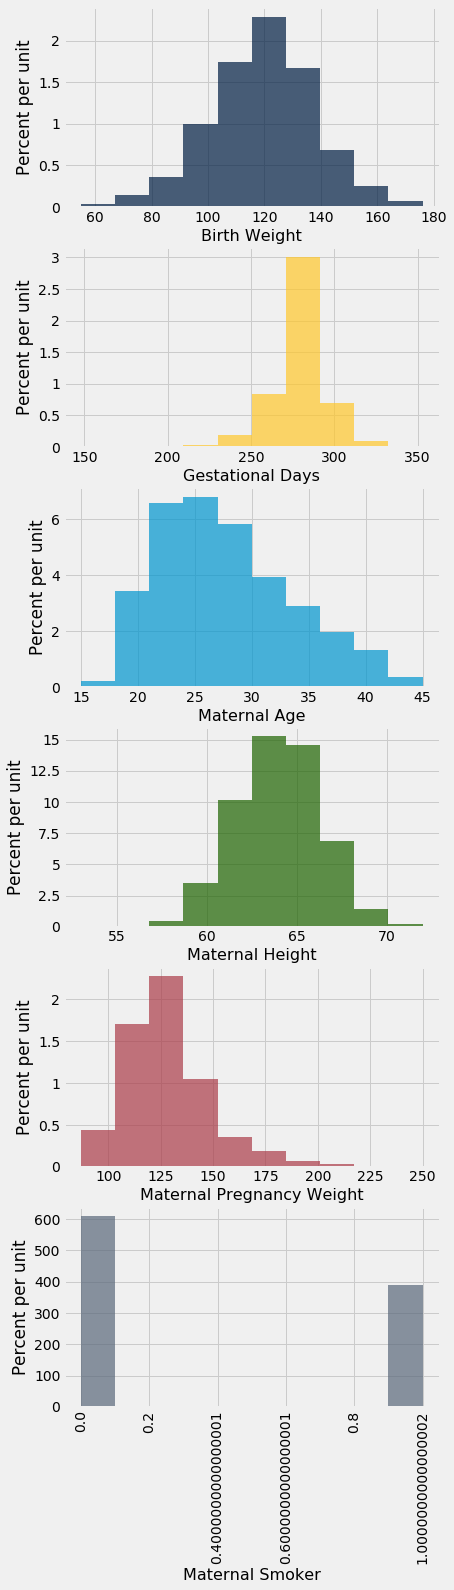

In [4]:
births.hist(overlay = False)

In [5]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.72544970428041)

In [6]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [7]:
within_3_SDs.num_rows/births.num_rows

0.9863713798977853

In [8]:
1 - 1/9

0.8888888888888888

In [9]:
# See if Chebyshev's bounds work for different distributions

for k in births.labels:
    values = births.column(k)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(k)
    for z in np.arange(1, 6):
        chosen = births.where(k, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows/births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '%')


Birth Weight
Average plus or minus 1 SDs: 69.25 %
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.57 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Gestational Days
Average plus or minus 1 SDs: 79.47 %
Average plus or minus 2 SDs: 93.78 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.57 %
Average plus or minus 5 SDs: 99.83 %

Maternal Age
Average plus or minus 1 SDs: 67.46 %
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.91 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Maternal Height
Average plus or minus 1 SDs: 67.38 %
Average plus or minus 2 SDs: 97.19 %
Average plus or minus 3 SDs: 99.66 %
Average plus or minus 4 SDs: 99.91 %
Average plus or minus 5 SDs: 100.0 %

Maternal Pregnancy Weight
Average plus or minus 1 SDs: 73.85 %
Average plus or minus 2 SDs: 95.06 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.49 %
Average plus or minus 

**Back to slides.**

## Standard Units ##

In [10]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x))/np.std(x)

In [11]:
ages = births.column('Maternal Age')

In [12]:
ages_standard_units = standard_units(ages)

In [13]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [14]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


**Back to slides.**

In [15]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

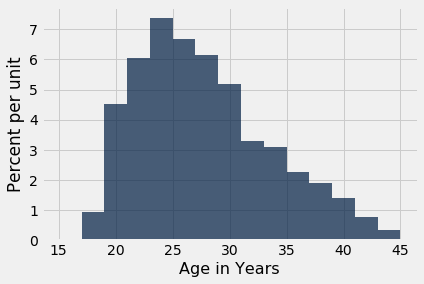

In [16]:
both.hist(0, bins = np.arange(15, 46, 2))

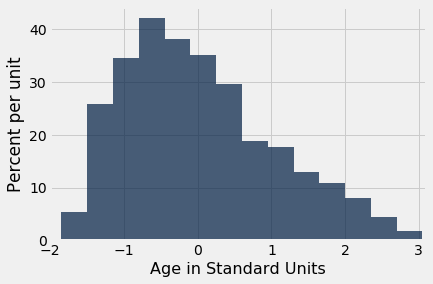

In [17]:
both.hist(1, bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## The SD and Bell Shaped Curves ##

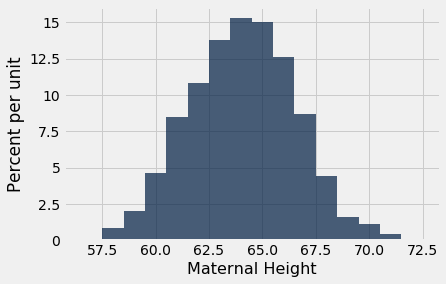

In [18]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [19]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

**Back to slides.**

## Normal Distributions ##

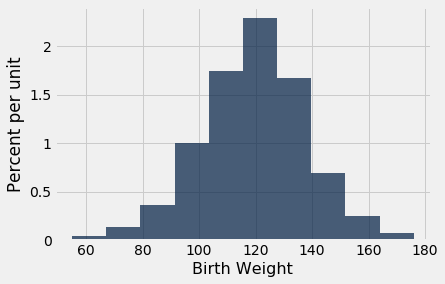

In [20]:
births.hist('Birth Weight')

In [21]:
bw = births.column('Birth Weight')
mean_w = np.mean(bw)
sd_w = np.std(bw)
mean_w, sd_w

(119.46252129471891, 18.32086370220278)

**Back to slides.**

## Central Limit Theorem ##

In [22]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


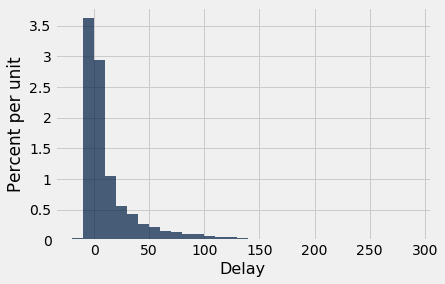

In [23]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [24]:
delays = united.column('Delay')
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [25]:
united = united.with_columns(
    'Delay in Standard Units', standard_units(delays)
)
united.sort('Delay', descending=True)

Date,Flight Number,Destination,Delay,Delay in Standard Units
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788
7/23/15,1960,LAX,438,10.6722
6/23/15,1606,ORD,430,10.4696
6/4/15,1743,LAX,408,9.91236
6/17/15,1122,HNL,405,9.83637
7/27/15,572,ORD,385,9.32979


In [26]:
chosen = united.where('Delay in Standard Units', are.between(-3, 3))
chosen.num_rows/united.num_rows

0.9790235081374322

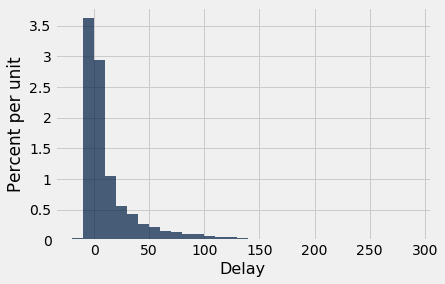

In [27]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

**Goal:**
- Fix a sample size, say 10.
- Sample 10 times randomly with replacement from all the flights; find the average dealy of the sampled flights.
- Repeat this "sample and find the sample mean" process numerous times.
- Draw a histogram of the numerous sample means.

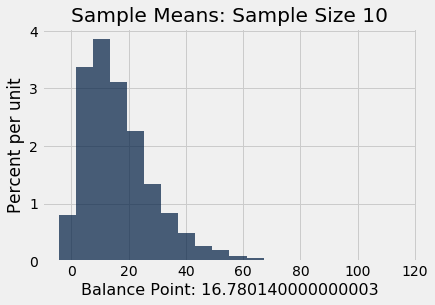

In [28]:
sample_size = 10
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sampled_flights = united.sample(sample_size)
    sample_mean = np.mean(sampled_flights.column('Delay'))
    means = np.append(means, sample_mean)
    
Table().with_columns('Sample Mean', means).hist(bins = 20)

plots.title('Sample Means: Sample Size ' + str(sample_size))

plots.xlabel('Balance Point: ' + str(np.mean(means)));

In [29]:
red_winnings = np.append(1*np.ones(18), -1*np.ones(20))
red = Table().with_columns('Winnings on Red', red_winnings)

In [30]:
red.show()

Winnings on Red
1
1
1
1
1
1
1
1
1
1


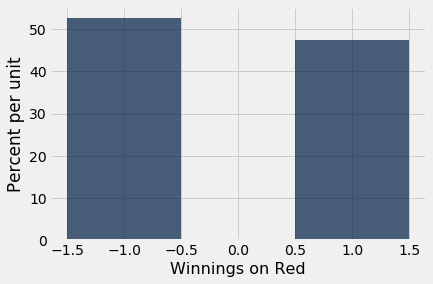

In [31]:
red.hist(bins = np.arange(-1.5, 1.6, 1))

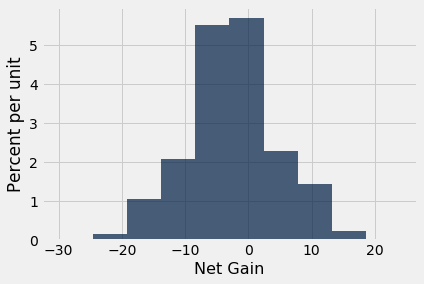

In [32]:
num_bets = 50
repetitions = 10000

net_gains = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    net = sum(spins.column('Winnings on Red'))
    net_gains = np.append(net_gains, net)
    
Table().with_columns('Net Gain', net_gains).hist()